In [1]:
def f(X):
    return 2 * X + 5

In [11]:
def cubic(X):
    return 2 * X ** 3 + 5

In [2]:
import torch

X = torch.normal(0,0.1,(3,4), requires_grad=True)

In [3]:
X

tensor([[ 0.0525,  0.0678,  0.0213,  0.0911],
        [ 0.0982, -0.0013,  0.0942,  0.0509],
        [ 0.0502, -0.1572, -0.0955, -0.0171]], requires_grad=True)

In [4]:
y = f(X)

In [7]:
with torch.no_grad():
    print(y)
    print(y.sum())

tensor([[5.1050, 5.1356, 5.0426, 5.1822],
        [5.1964, 4.9974, 5.1885, 5.1018],
        [5.1005, 4.6855, 4.8090, 4.9658]], grad_fn=<AddBackward0>)
tensor(60.5103)


In [8]:
y.sum().backward()

In [10]:
X.grad, X.grad.shape, X.shape

(tensor([[2., 2., 2., 2.],
         [2., 2., 2., 2.],
         [2., 2., 2., 2.]]),
 torch.Size([3, 4]),
 torch.Size([3, 4]))

In [15]:
X.grad.zero_()

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [16]:
y = cubic(X)

In [17]:
print(y.detach())

tensor([[5.0003, 5.0006, 5.0000, 5.0015],
        [5.0019, 5.0000, 5.0017, 5.0003],
        [5.0003, 4.9922, 4.9983, 5.0000]])


In [18]:
y.sum().backward()

In [19]:
X.grad, X.grad.shape

(tensor([[1.6535e-02, 2.7590e-02, 2.7244e-03, 4.9806e-02],
         [5.7888e-02, 9.8641e-06, 5.3284e-02, 1.5554e-02],
         [1.5139e-02, 1.4836e-01, 5.4744e-02, 1.7564e-03]]),
 torch.Size([3, 4]))

# Vanishing gradients

In [20]:
# with sigmoid function
import matplotlib.pyplot as plt

In [21]:
X = torch.arange(-8.0, 8.0,1, requires_grad=True)
X

tensor([-8., -7., -6., -5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,
         6.,  7.], requires_grad=True)

In [22]:
y = torch.sigmoid(X)

y.detach()

tensor([3.3535e-04, 9.1105e-04, 2.4726e-03, 6.6929e-03, 1.7986e-02, 4.7426e-02,
        1.1920e-01, 2.6894e-01, 5.0000e-01, 7.3106e-01, 8.8080e-01, 9.5257e-01,
        9.8201e-01, 9.9331e-01, 9.9753e-01, 9.9909e-01])

In [24]:
y.sum().backward()

In [26]:
y.detach().shape

tensor([3.3535e-04, 9.1105e-04, 2.4726e-03, 6.6929e-03, 1.7986e-02, 4.7426e-02,
        1.1920e-01, 2.6894e-01, 5.0000e-01, 7.3106e-01, 8.8080e-01, 9.5257e-01,
        9.8201e-01, 9.9331e-01, 9.9753e-01, 9.9909e-01])

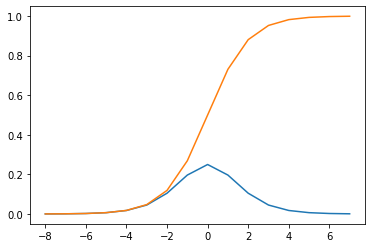

In [31]:
plt.plot(X.detach(), X.grad.detach())
plt.plot(X.detach(), y.detach())
plt.show()